<a href="https://colab.research.google.com/github/sanglee/KIBME2019/blob/master/1_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning & AI: Supervised Learning

-----------


<br><br>

<h3><div style="text-align: center"> 한양대학교 에리카, AI Lab <br><br>
이상근 </div> </h3>



## Three Types of Learning Problems

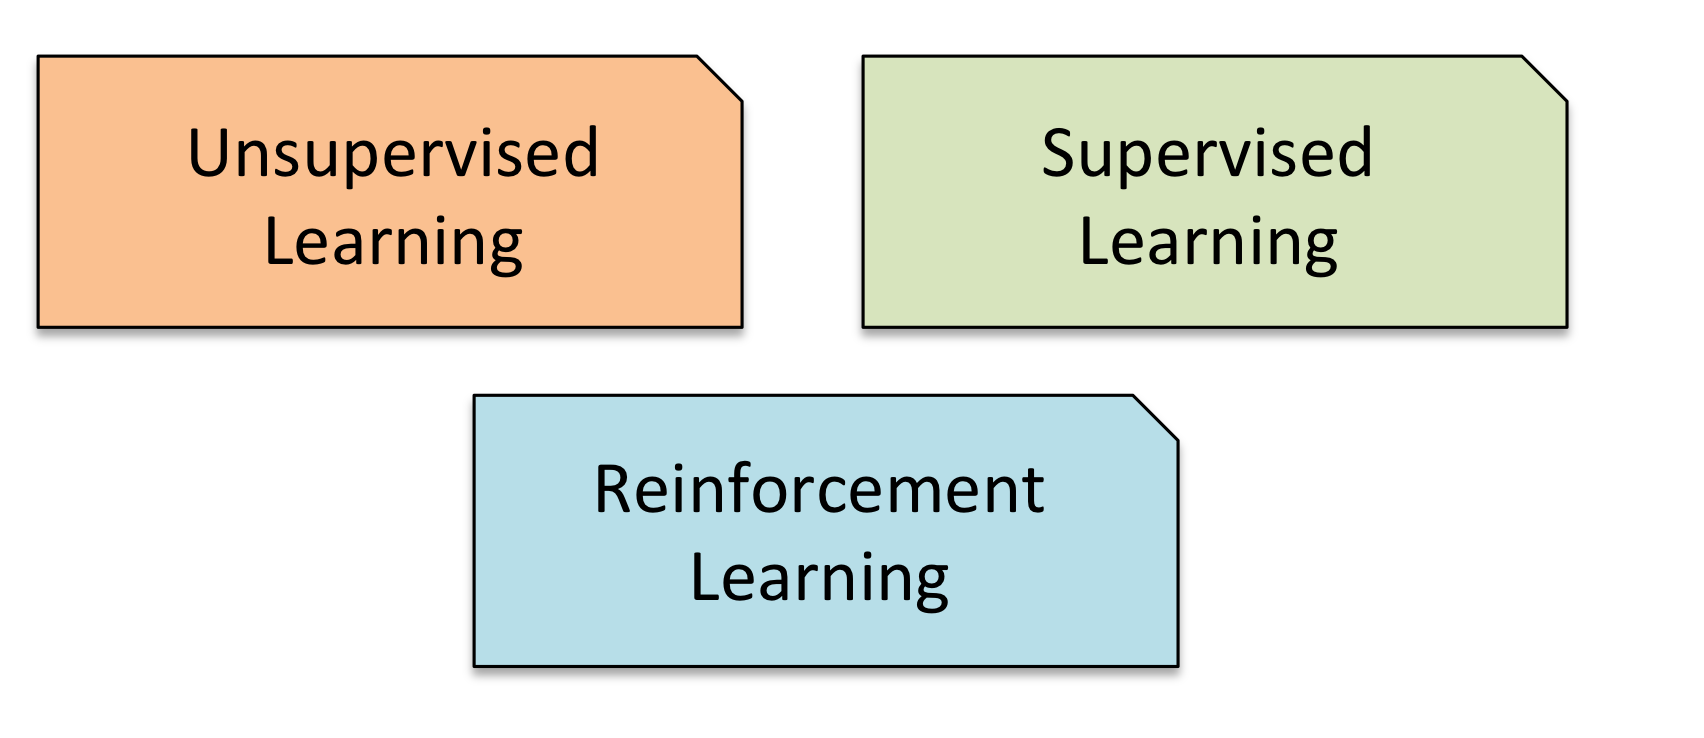

In [0]:
from IPython.display import Image
Image(filename='./images/01_01.png', width=550) 

## Supervised learning: Making predictions about the future

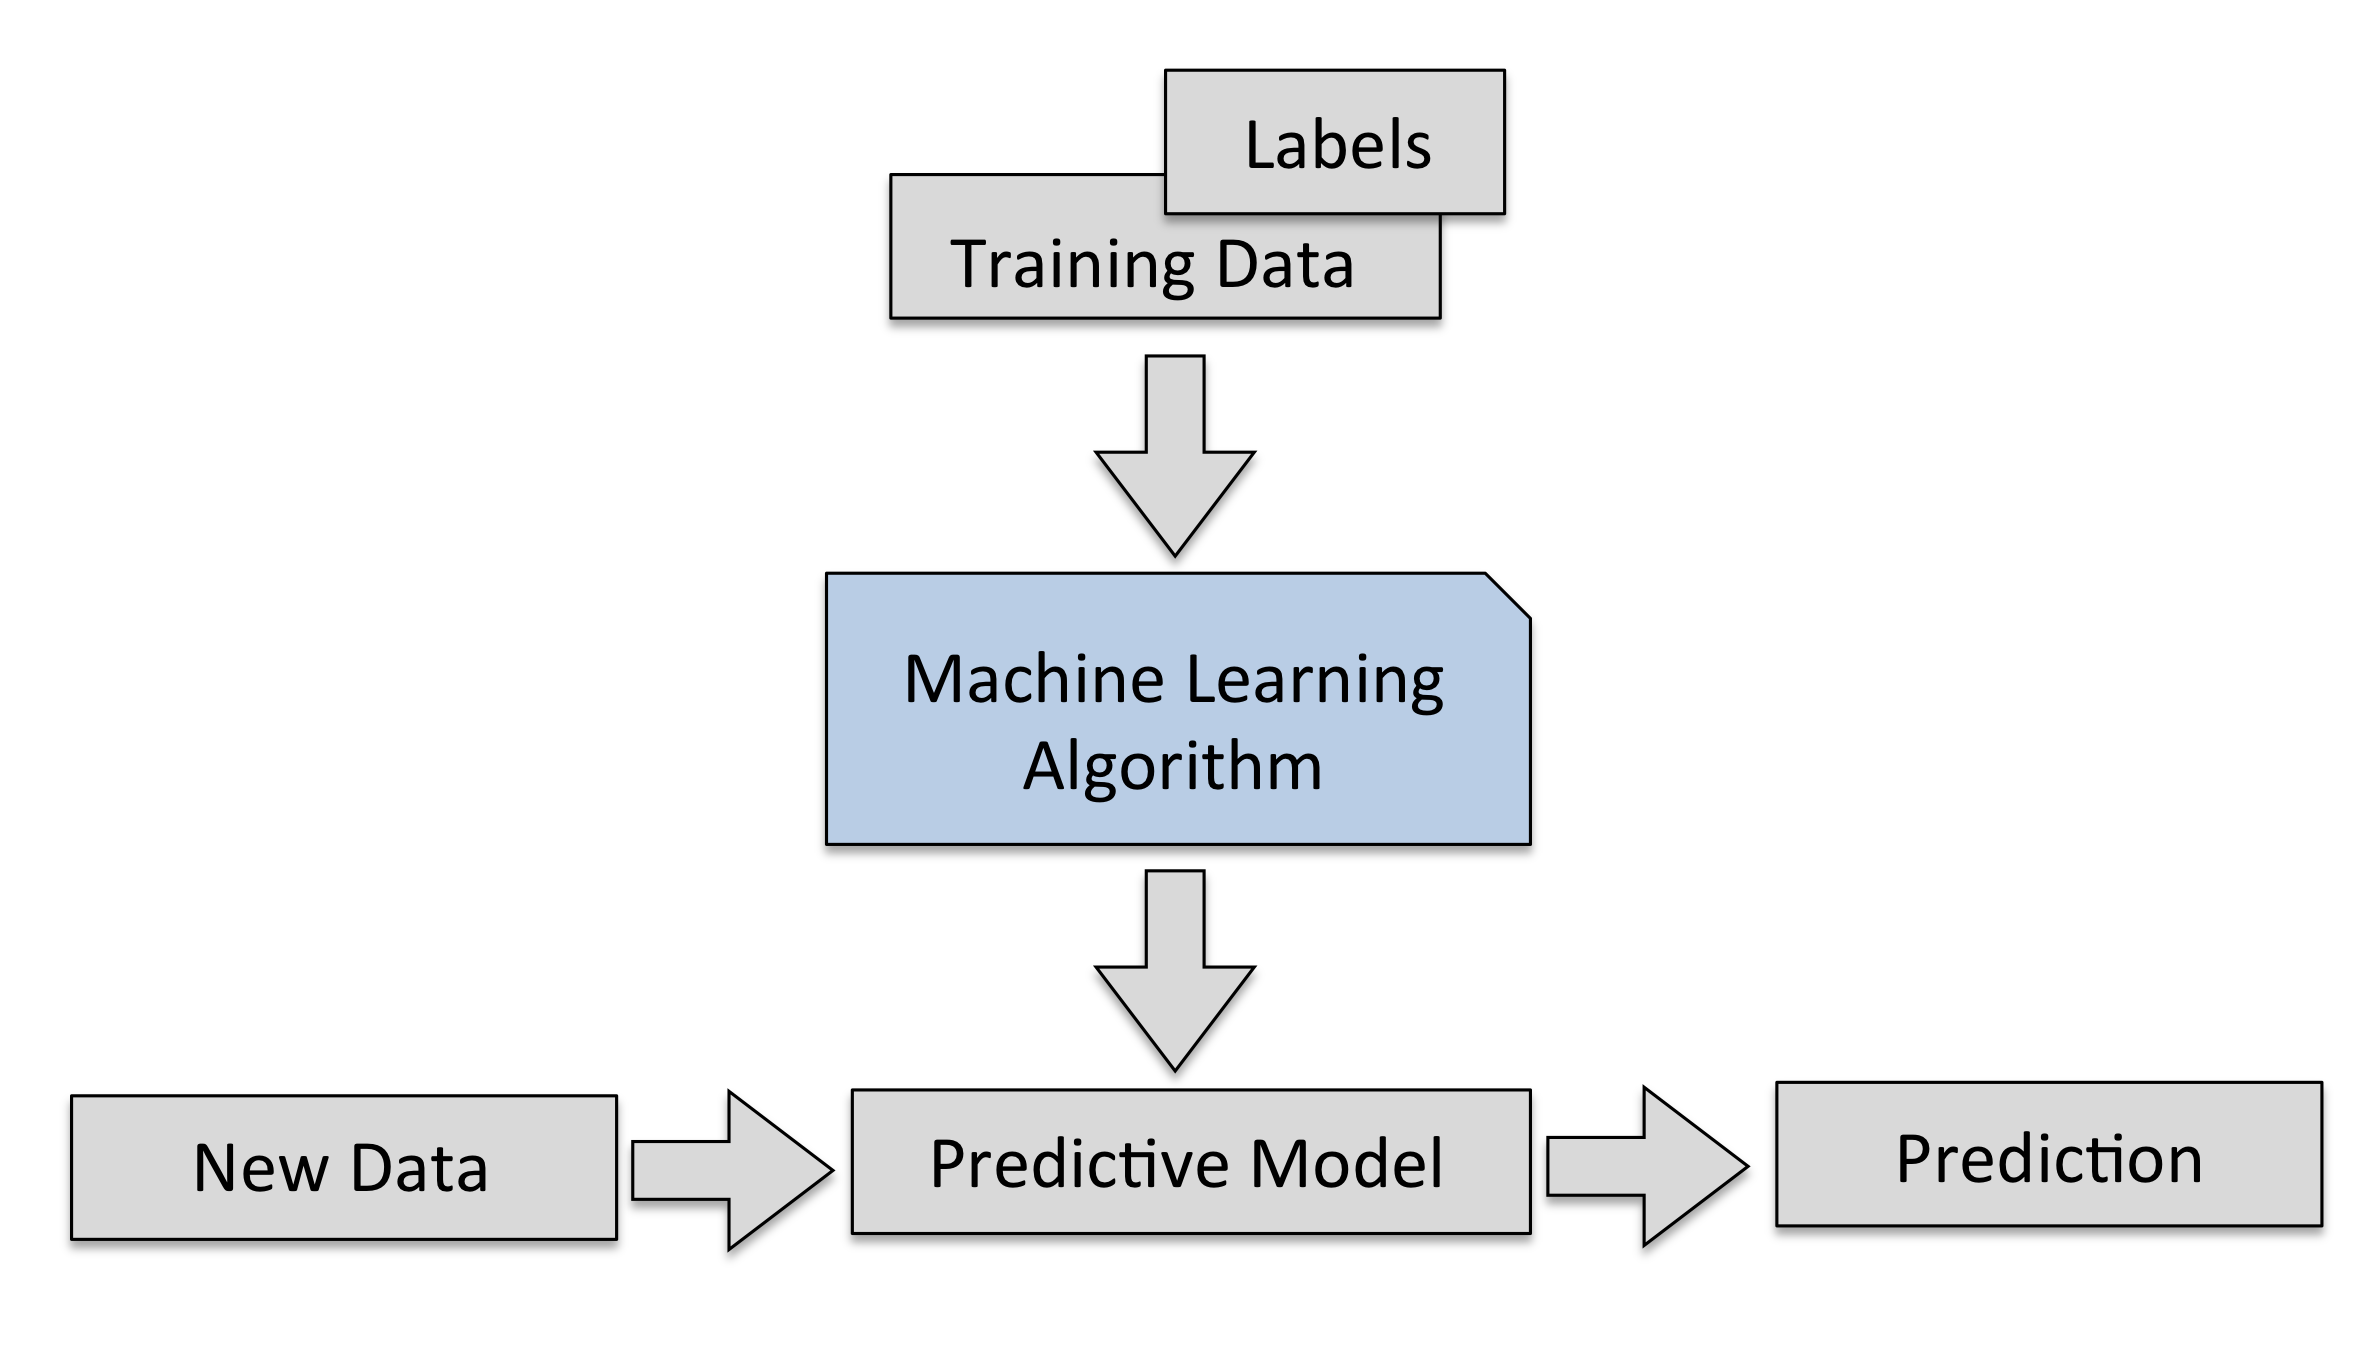

In [0]:
Image(filename='./images/01_02.png', width=600) 

- Supervised Learning: learn a model from **labeled training data** to make predictions about unseen data points

- **Supervised**: refers to the fact that the desired output labels of training samples are already known

- Ex. spam email filtering

Two types:
- **Classification**: a supervised learning task with discrete class labels
- **Regression**: a supervised learning task where outcome signal is a continuous value

## Classification

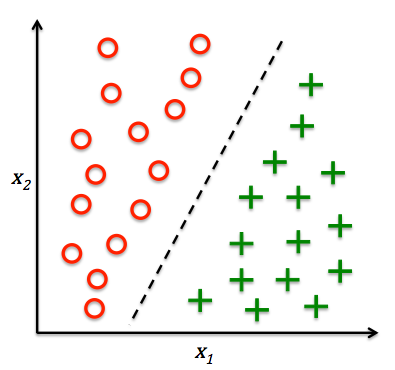

In [0]:
Image(filename='./images/01_03.png', width=300) 

**Terminology**
- decision boundary
- positive & negative classes

## Classification

for predicting the categorical **class labels** of new instances based on past observations

- Class labels
 - discrete, unordered values
 - can be understood as *group membership* of instances

**Types of classification**
- Binary classification: distinguish between two possible classes
  - e.g. spam vs. non-spam emails

- Multi-class classification: distinguish amongst multiple classes
  - e.g. handwritten digits from 0 to 9


## Regression

for predicting continuous outcomes

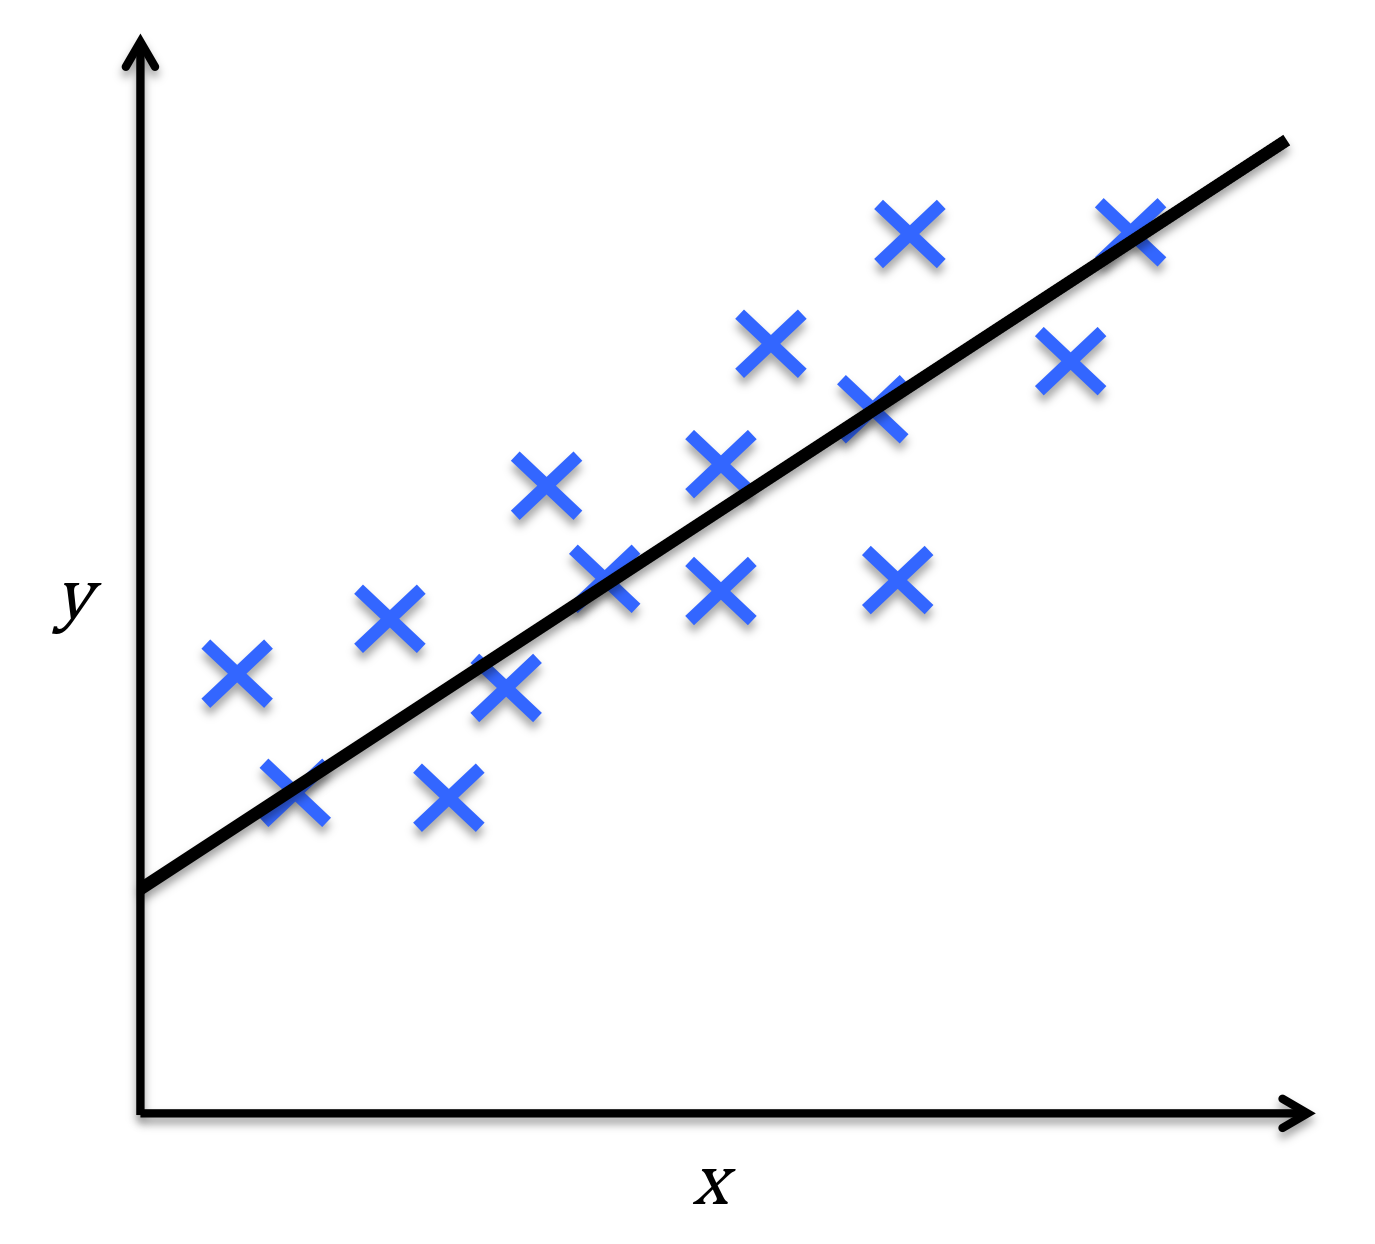

In [0]:
Image(filename='./images/01_04.png', width=300) 

- linear regression: slope and intercept are learnt from data

## Regression

Goal: to predict continuous outcome

Given:
- A number of **predictor** (explanatory) variables (e.g. time spent for studying)
- A continuous **response** (outcome) variable (e.g. math SAT score)

We try to find a relationship between those variables that allows us to predict the outcome



## Basic Terminology

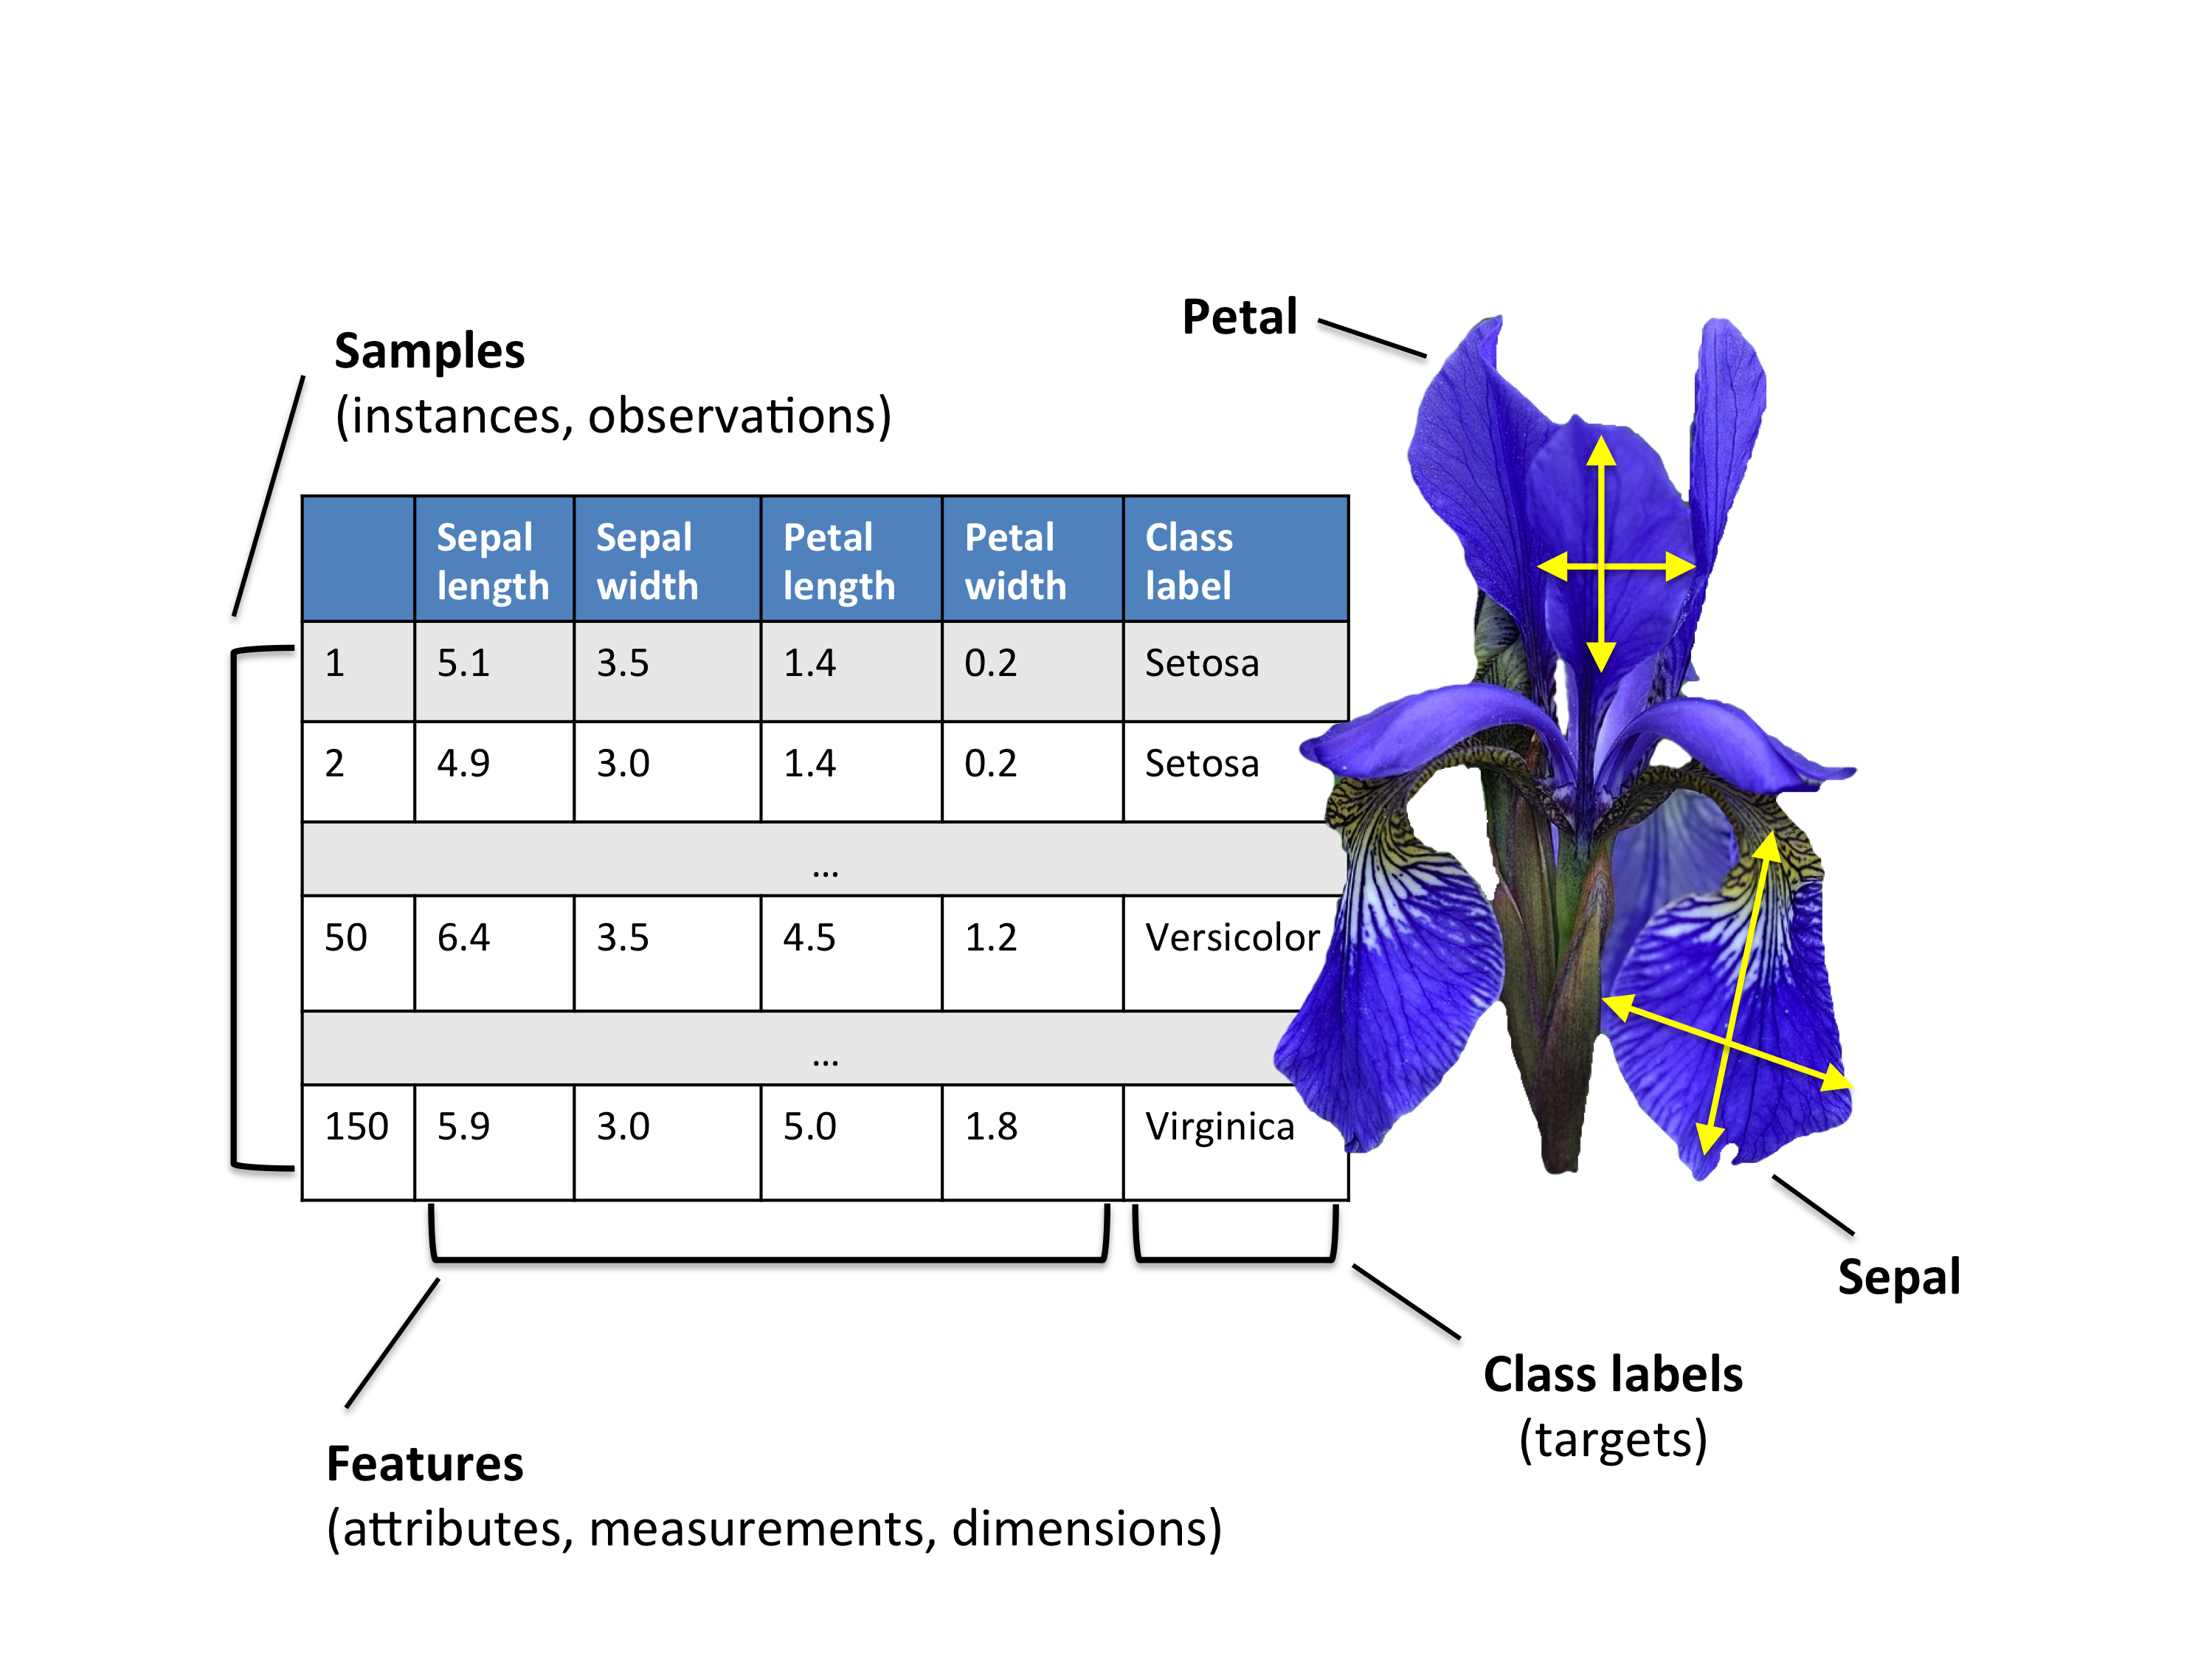

In [0]:
Image(filename='./images/01_08.png', width=600) 

The Iris dataset: 150 iris flowers from three different species (Setosa, Versicolor, and Virginica)

Feature (data) matrix X: samples as rows, featues as columnes

In [0]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[0:100, [0,2]]
y = iris.target[0:100]

- First 50 samples: Iris-Setosa
- Next 50 samples: Iris-Versicolor

### Plotting the Iris data

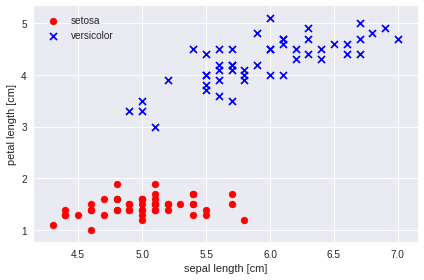

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Roadmap of Machine Learning

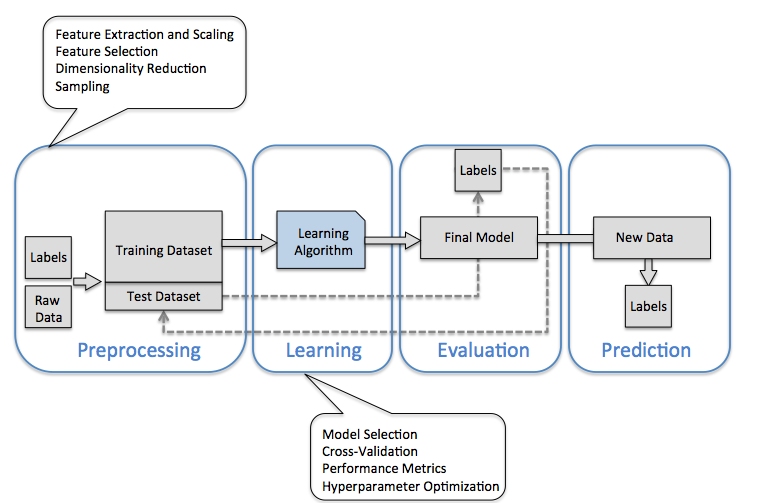

In [0]:
Image(filename='./images/01_09.png', width=800) 

## Preprocessing: getting data into shape

- One of the most crucial steps
 - Iris dataset: useful features can be color, hue, intensity of flowers, height, etc.

- **Scaling**: many ML algorithms require the selected features are on the same scale
 - e.g. in the range of [0,1]
- Some features may be highly correlatedd and therefore redundant
 - **Dimensionality reduction** can be useful for compressing the features onto a lower dimensional subspace
- Split a dataset into two parts:
  - **Training set**: to train and optimize our machine learning algorithm
  - **Test set**: keep it till the very endd to evalute the final model

## Training and selecting a predictive model

#### "No Free Lunch" theorem [David Wolpert, 1996]

No single classifier works best across all possible scenarios. 

- In practice, it is always recommended to compare the performance of at least a handful of different learning algorithms


- Select the best model for the particular problem, depending on
    - the number of features or samples
    - the amount of noise in a dataset
    - the classes are linearly separable or not.


- **Validation set**: a subset of the training data, used for model selection
  - Used for tuning hyperparameters
  - <font color=red>Warning: do not touch the test data till the end, for performance evaluation regarding future data points</font>

    

In [0]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # for demo, choose two features
y = iris.target

print(y)
print('Class labels:', np.unique(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Standardizing the features:

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) # not on the test set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Evaluating models and predicting unseen data instances

**Generalization error** : After we've selected a model that has been fitted on the training ddata, we can use the test dataset to estimate how well it may perform on unseen data to estimate the 

If we're satisfied with the performance, we can use this model to predict new, future data

Important note: feature scaling and dimensionality reduction must be obtained solely from the training dataset, and the same parameters are later applied to transform the test dataset

# Artificial Neural Networks

### MCP Neuron [McCullock & Pitts, 1943]

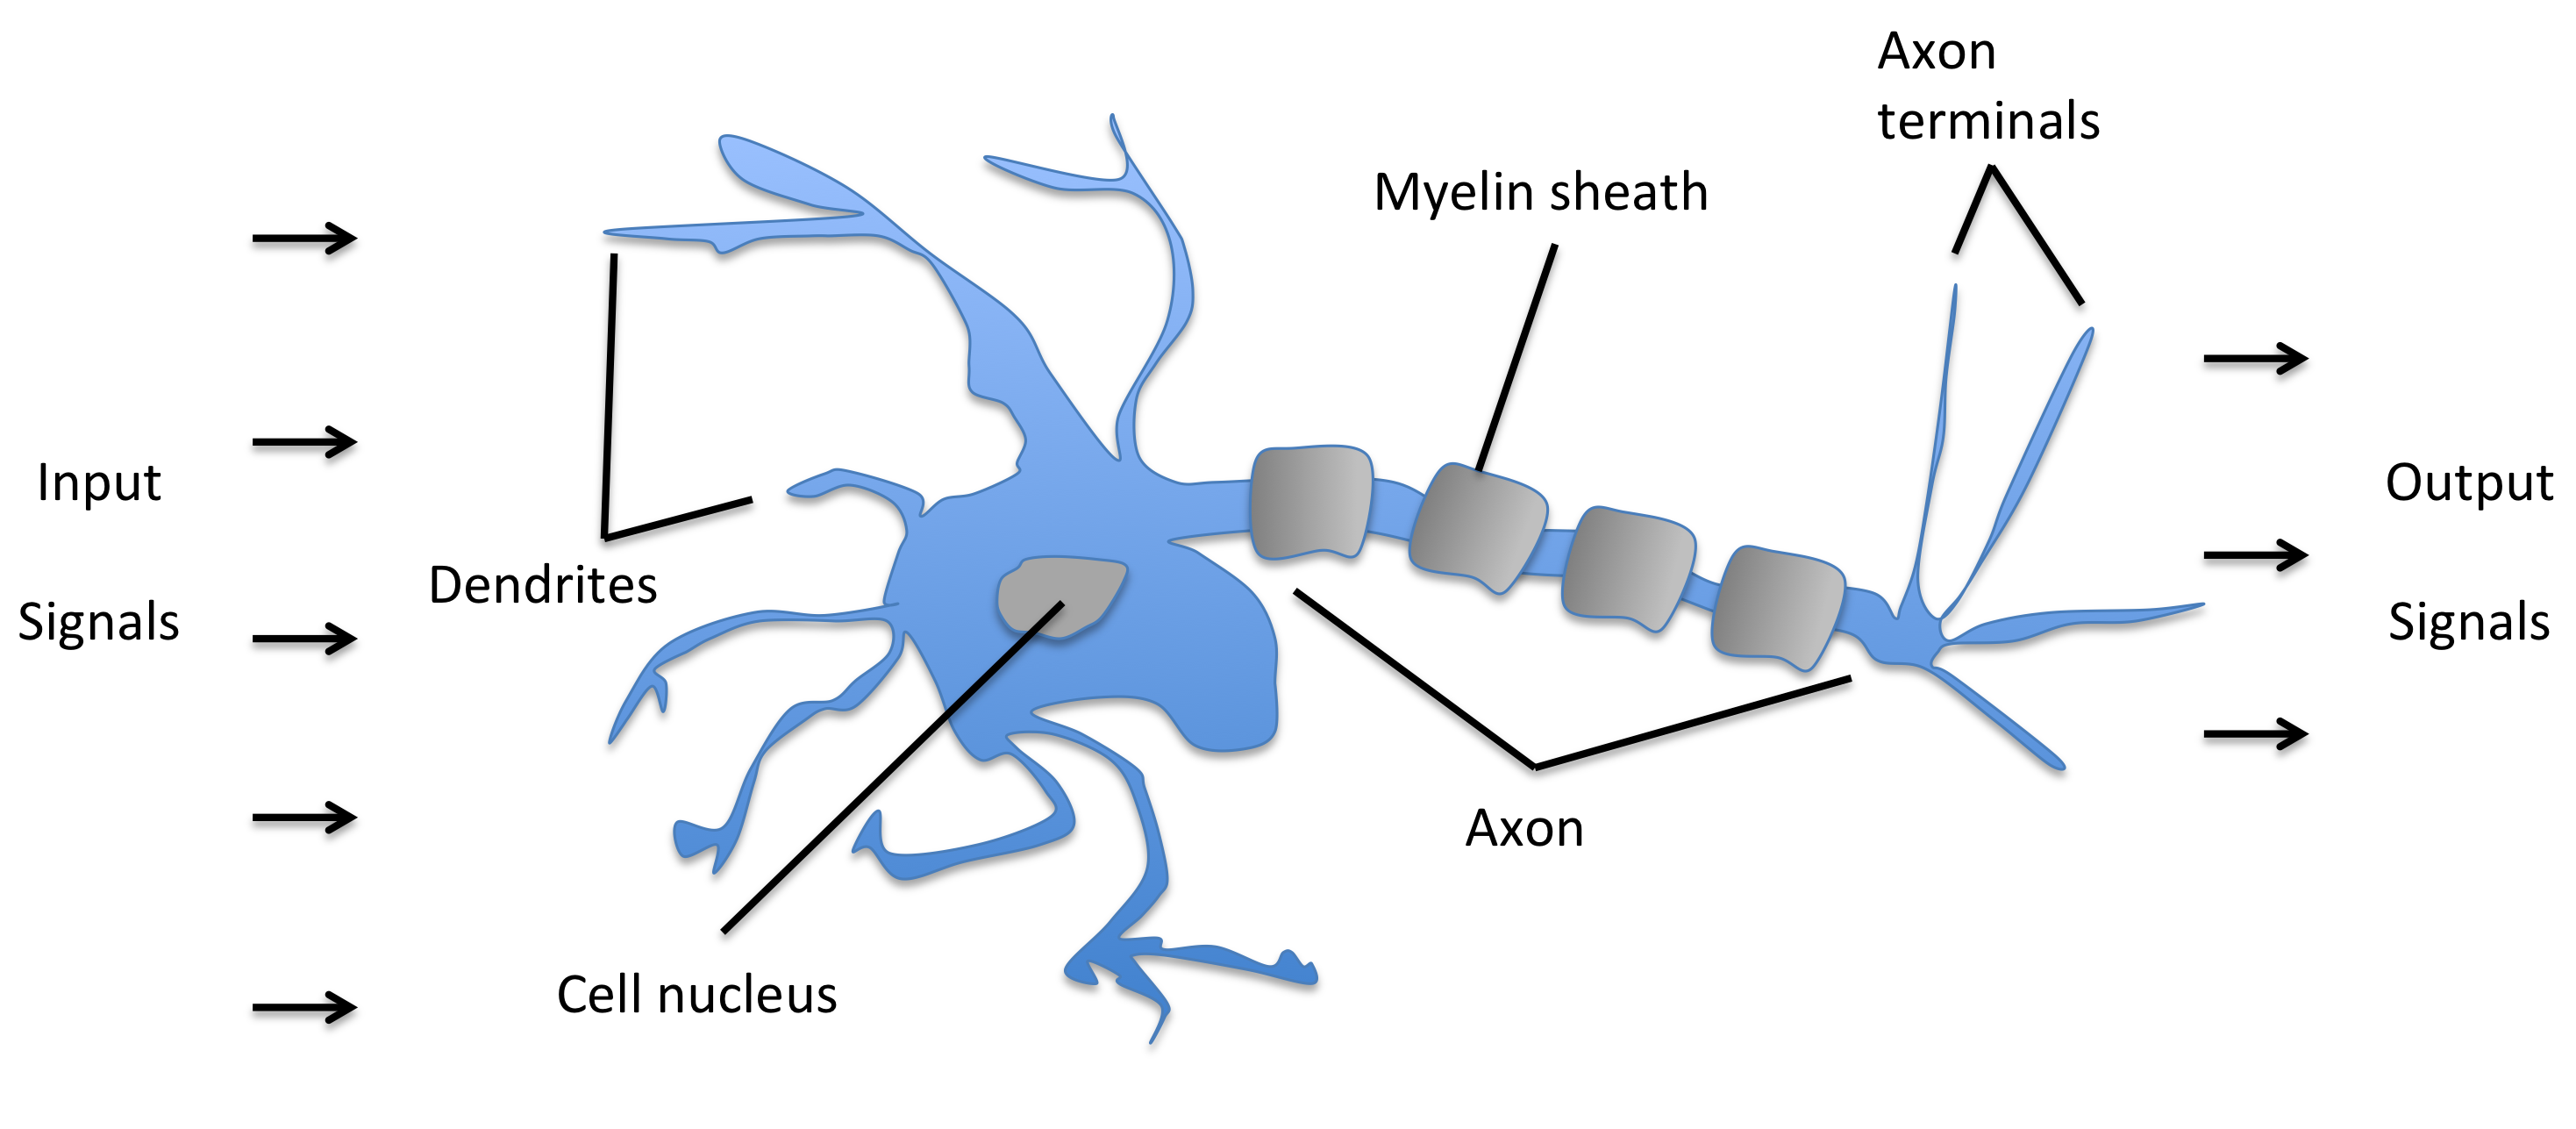

In [0]:
Image(filename='./images/02_01.png', width=900) 

### Perceptron [Rosenblatt, 1957]

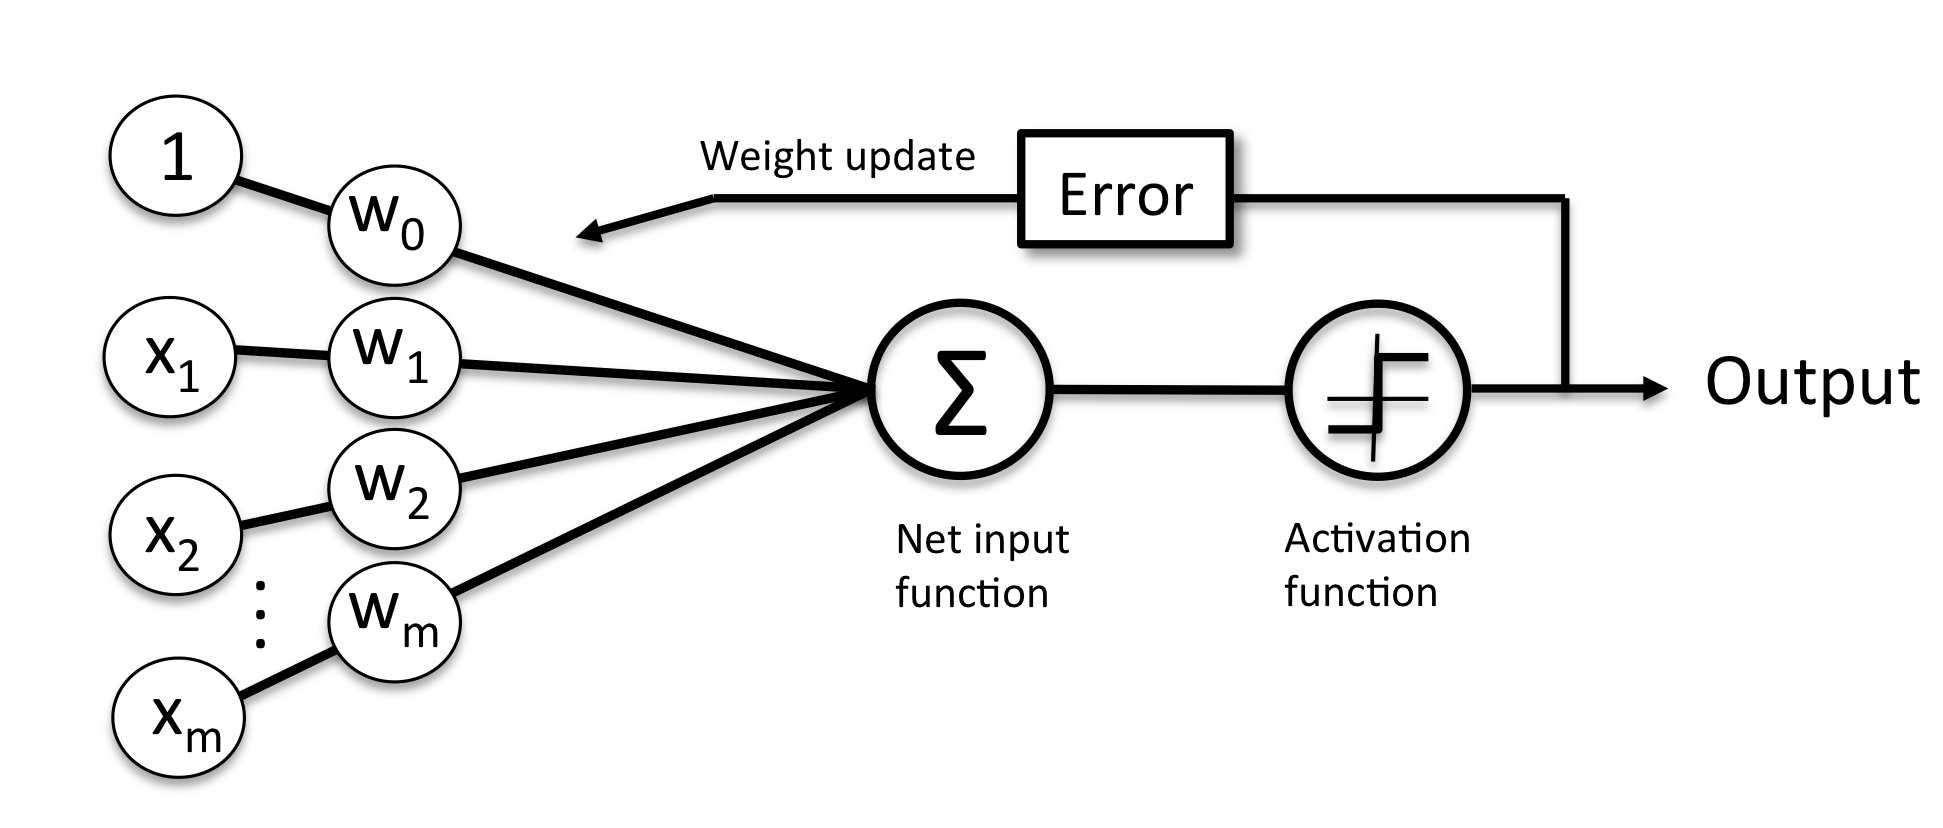

In [0]:
Image(filename='./images/02_04.png', width=800) 

#### Linear prediction 
$$z = w^T x = \sum_{i=0}^m w_i x_i$$
Note that $x_0 = 1$

#### Activation function $\phi(z)$ 
: converts a linear prediction to a nonlinear output

In perceptron, the activation function is *a simple unit step function*, aka *Heaviside step function*:

$$
  \phi(z) = \begin{cases} 1 & \text{if $z \ge \theta$} \\ -1 & \text{otherwise} \end{cases}
$$

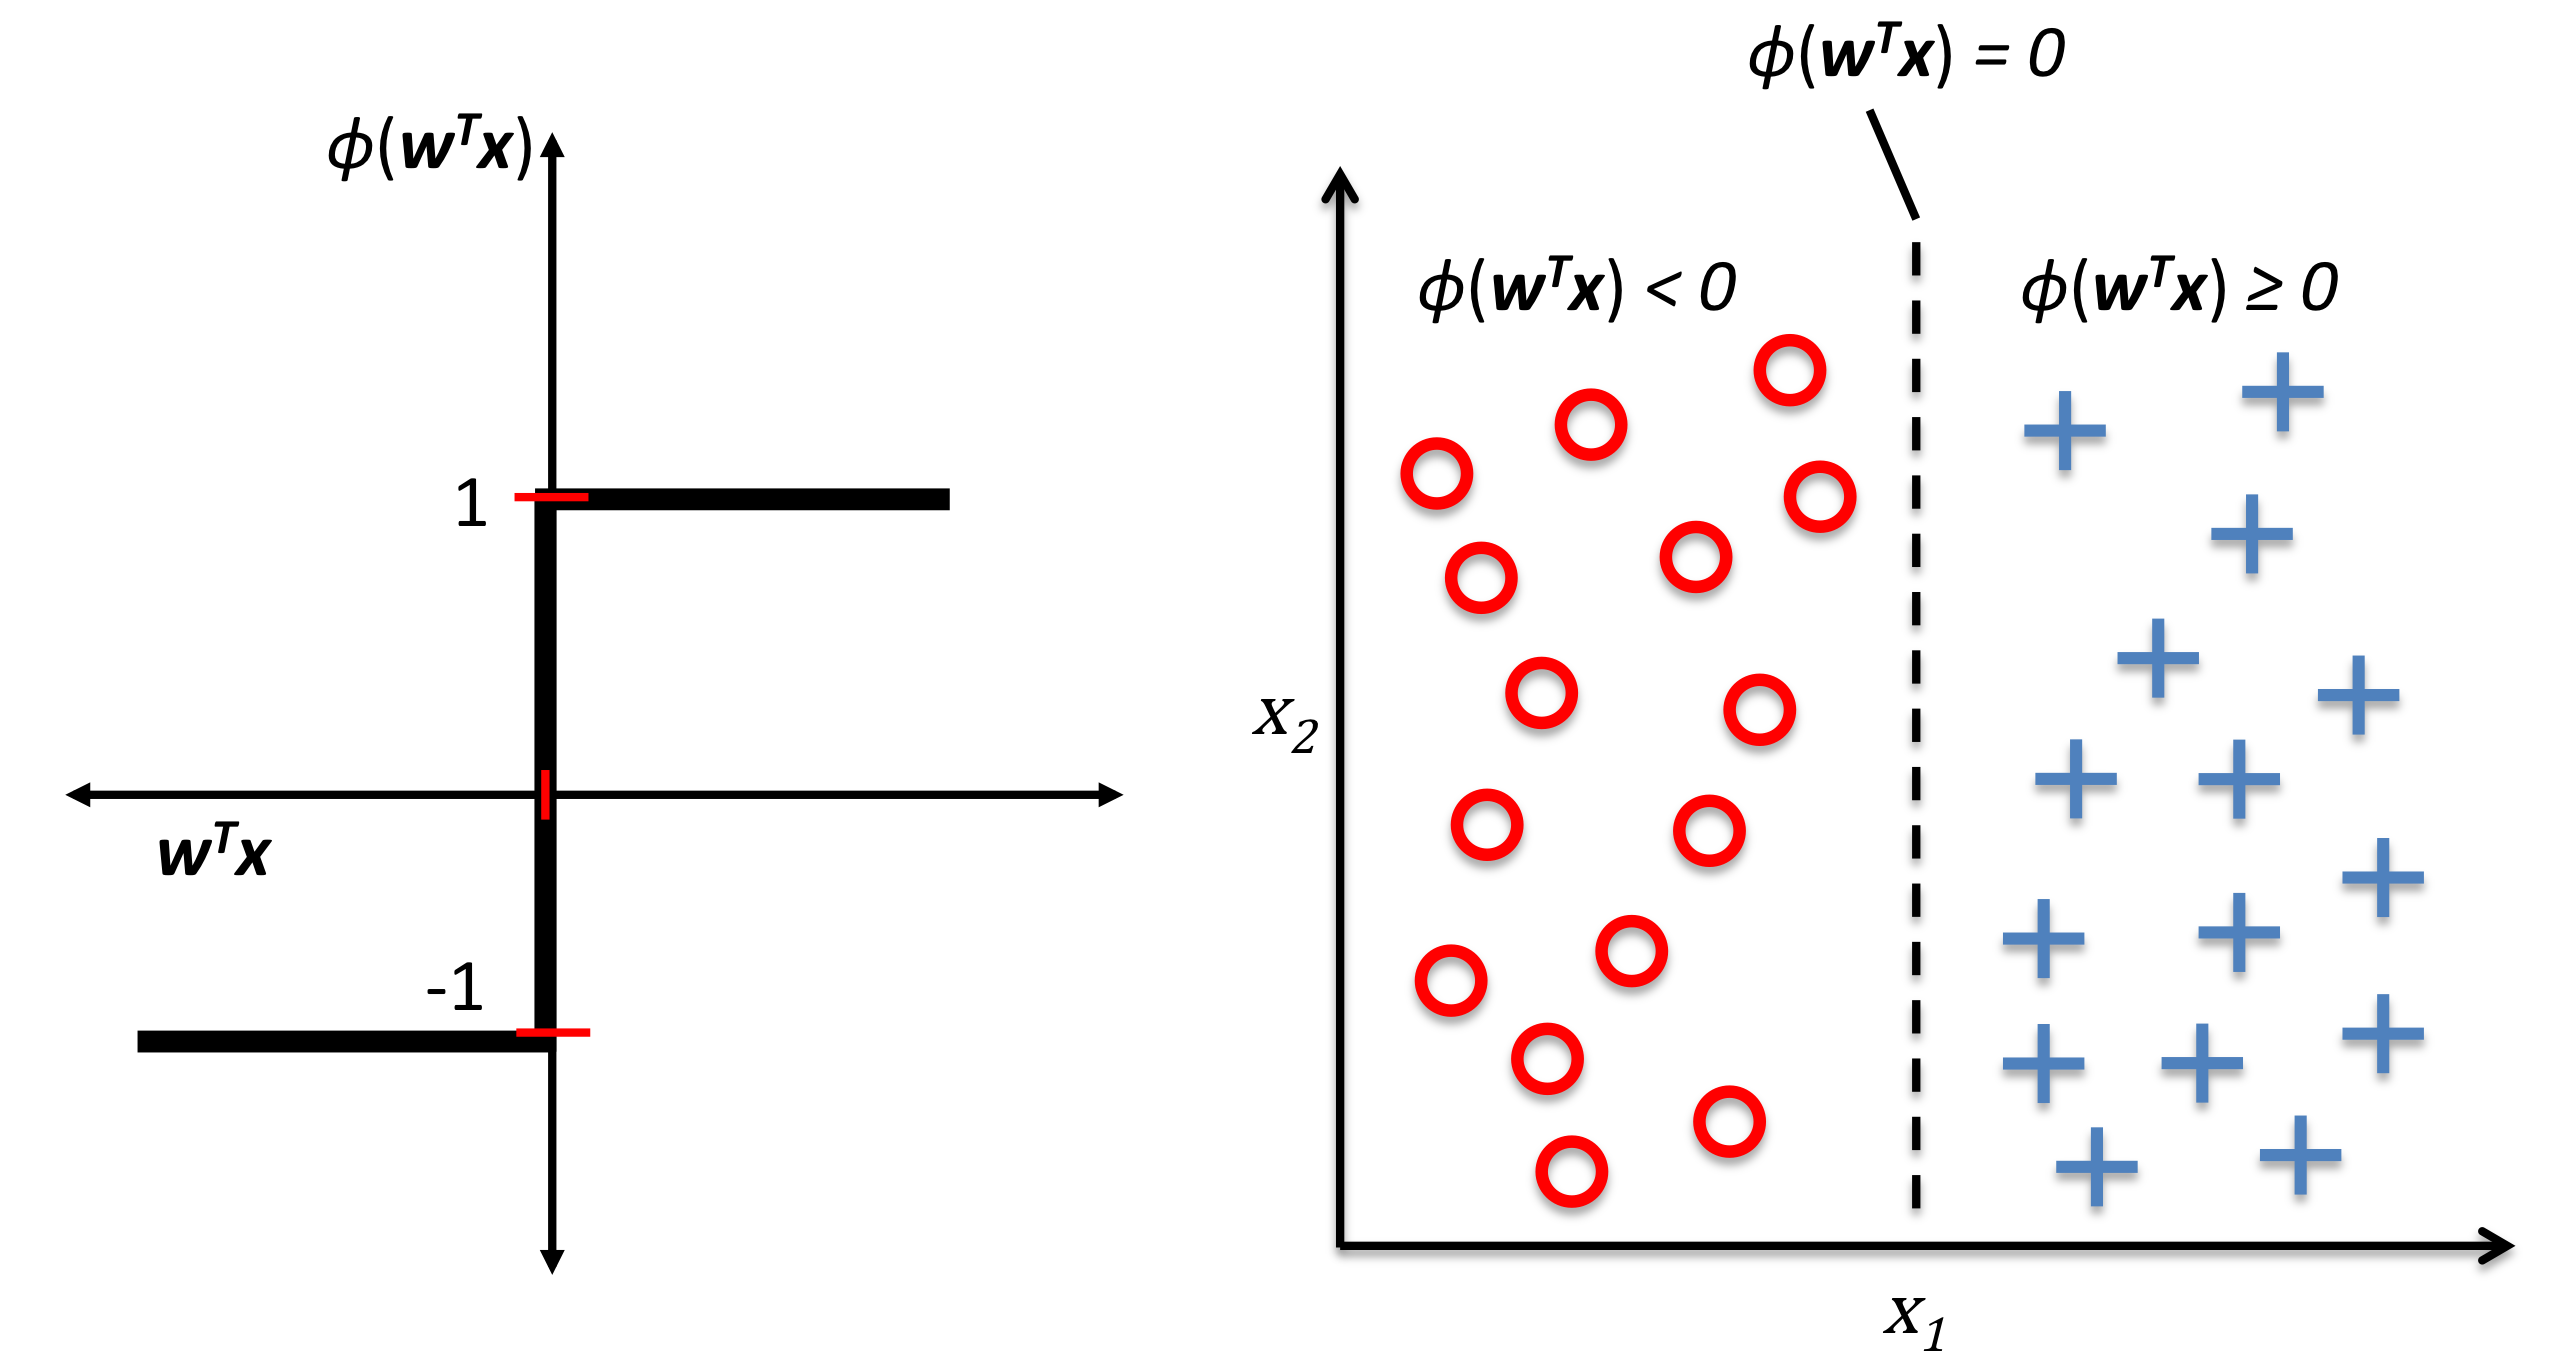

In [0]:
Image(filename='./images/02_02.png', width=900) 

### Perceptron Algorithm

1. Intialize all weights to zero or some small random numbers
2. For each training sample $x^{(i)}$, perform the following:

    2.1. Compute the prediction output $\hat y^{(i)} = \phi(w^T x^{(i)})$
    
    2.2. Update the weights:
    
$$
          w_j = w_j + \Delta w_j, \;\; \Delta w_j = \eta (y^{(i)} - \hat y^{(i)} ) x_j^{(i)}, \;\; j=1,2,\dots, m \quad \text{[Perceptron Learning Rule]}    
$$

- Here, $y^{(i)}$ is the true class label, and $\hat y^{(i)}$ is the predicted class label
- $\eta \in (0,1]$ is the *learning rate*

#### Convergence of the perceptron algorithm
: only guaranteed if 
  - (i) the two classes are linearly separable, and 
  - (ii) the learning rate is sufficiently small.
  
Otherwise, we set a maximum number of passes over the training dataset (*epochs*)

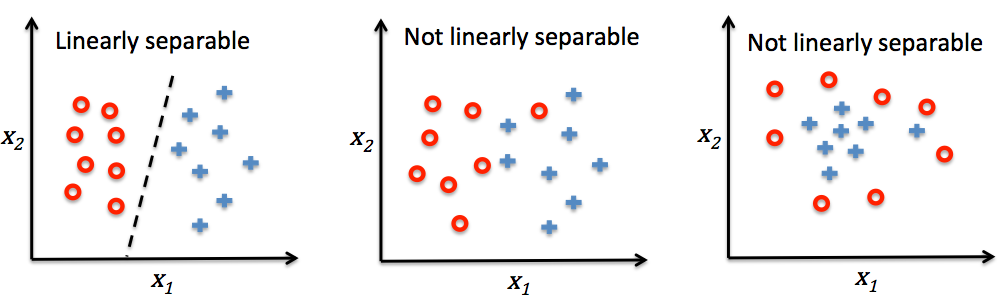

In [0]:
Image(filename='./images/02_03.png', width=1100) 

# ADAptive LInear Neurons (ADALINE) [B. Widrow & T. Hoff, 1960]

- Introduces the concept of the "cost (loss)" function into the perceptron
- Main difference: $\phi(w^T x) = w^T x$ (identity function)

The objective function of Adaline is the sum of squares (SSE):
$$
 J(w) = \frac12  \sum_{i=1}^n \big( y^{(i)} - \phi(z^{(i)}) \big)^2 
$$

$n$: size of the training set

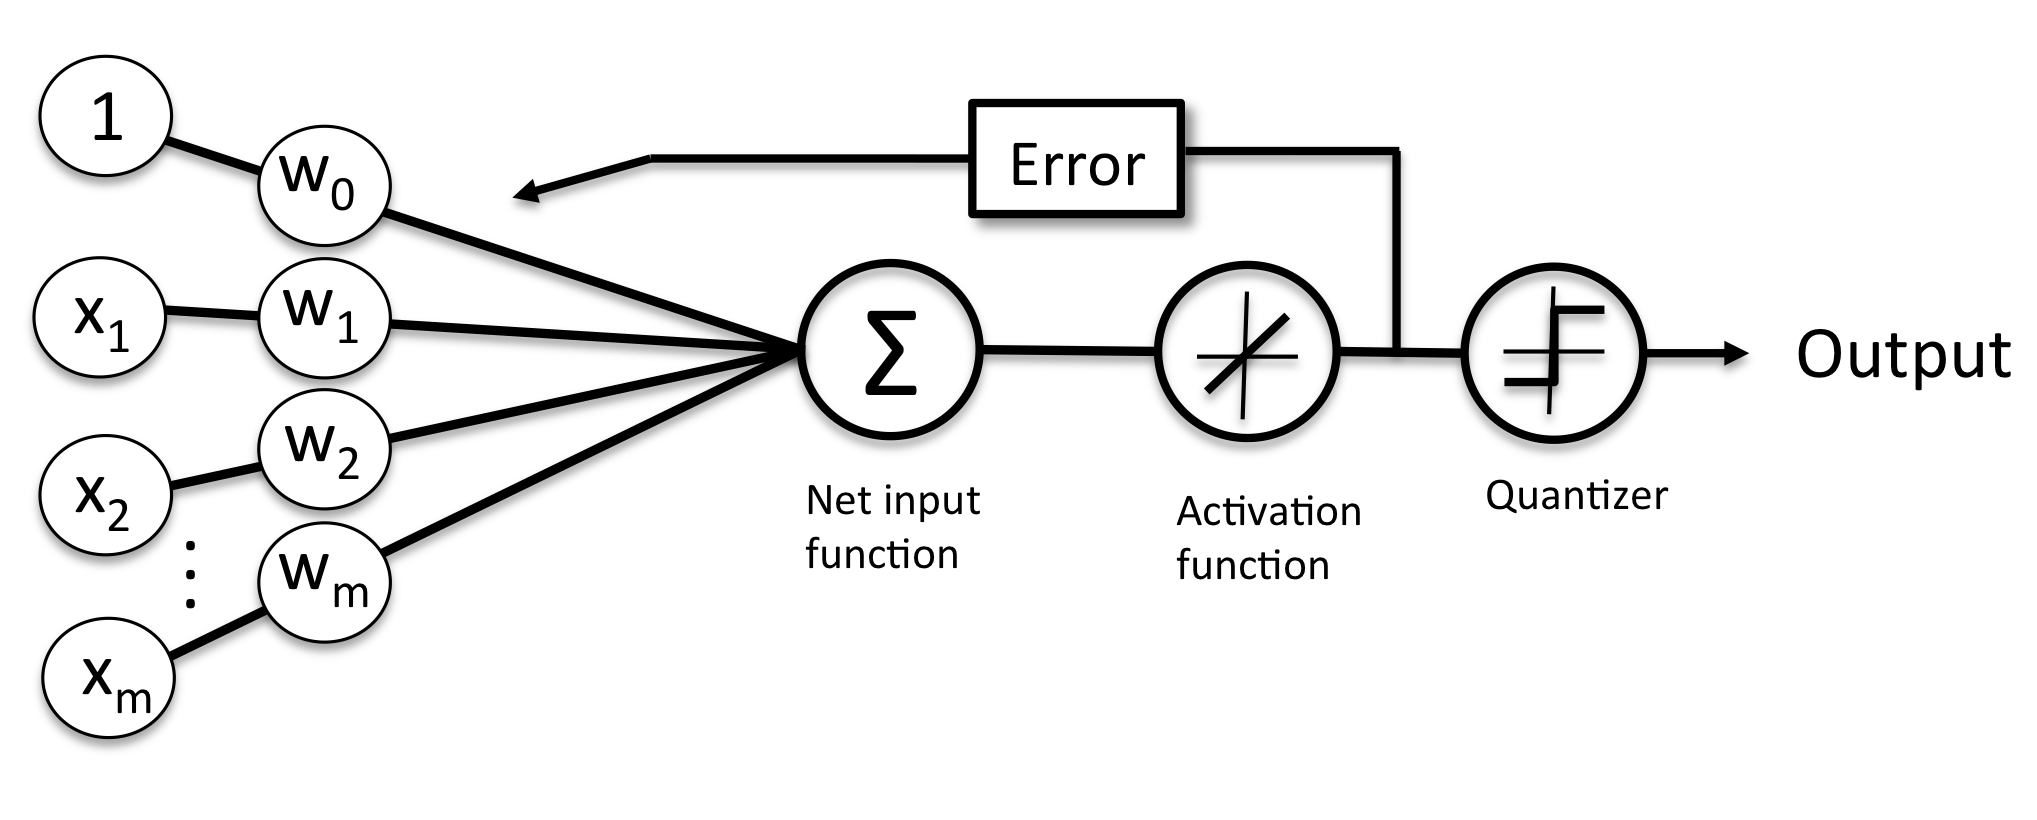

In [0]:
 Image(filename='./images/02_09.png', width=900) 

### Gradient Descent Algorithm

- $w = w + \Delta w$
- $\Delta w = - \eta \nabla J(w)$

$$
 J(w) = \frac12 \sum_i \big( y^{(i)} - \phi(z^{(i)}) \big)^2
$$

$$z = w^T x $$

\begin{align*}
 [\nabla J(w)]_j &= \frac{\partial J(w)}{\partial w_j} \\
  &= \frac{\partial}{\partial w_j} \frac12 \sum_i \big( y^{(i)} - \phi(z^{(i)}) \big)^2 \\
  &= \frac12 \sum_i 2 \big( y^{(i)} - \phi(z^{(i)}) \big) \frac{\partial}{\partial w_j} ( y^{(i)} - \phi(z^{(i)}) \big) \\
  &= - \sum_i \big( y^{(i)} - \phi(z^{(i)}) \big)x_j^{(i)}
\end{align*}

Differences to the original perceptron:
- $\phi(z)$ is a real number in Adaline, not an integer class label
- The weigth update is calculated based on all training samples (we often call this as "batch" learning)

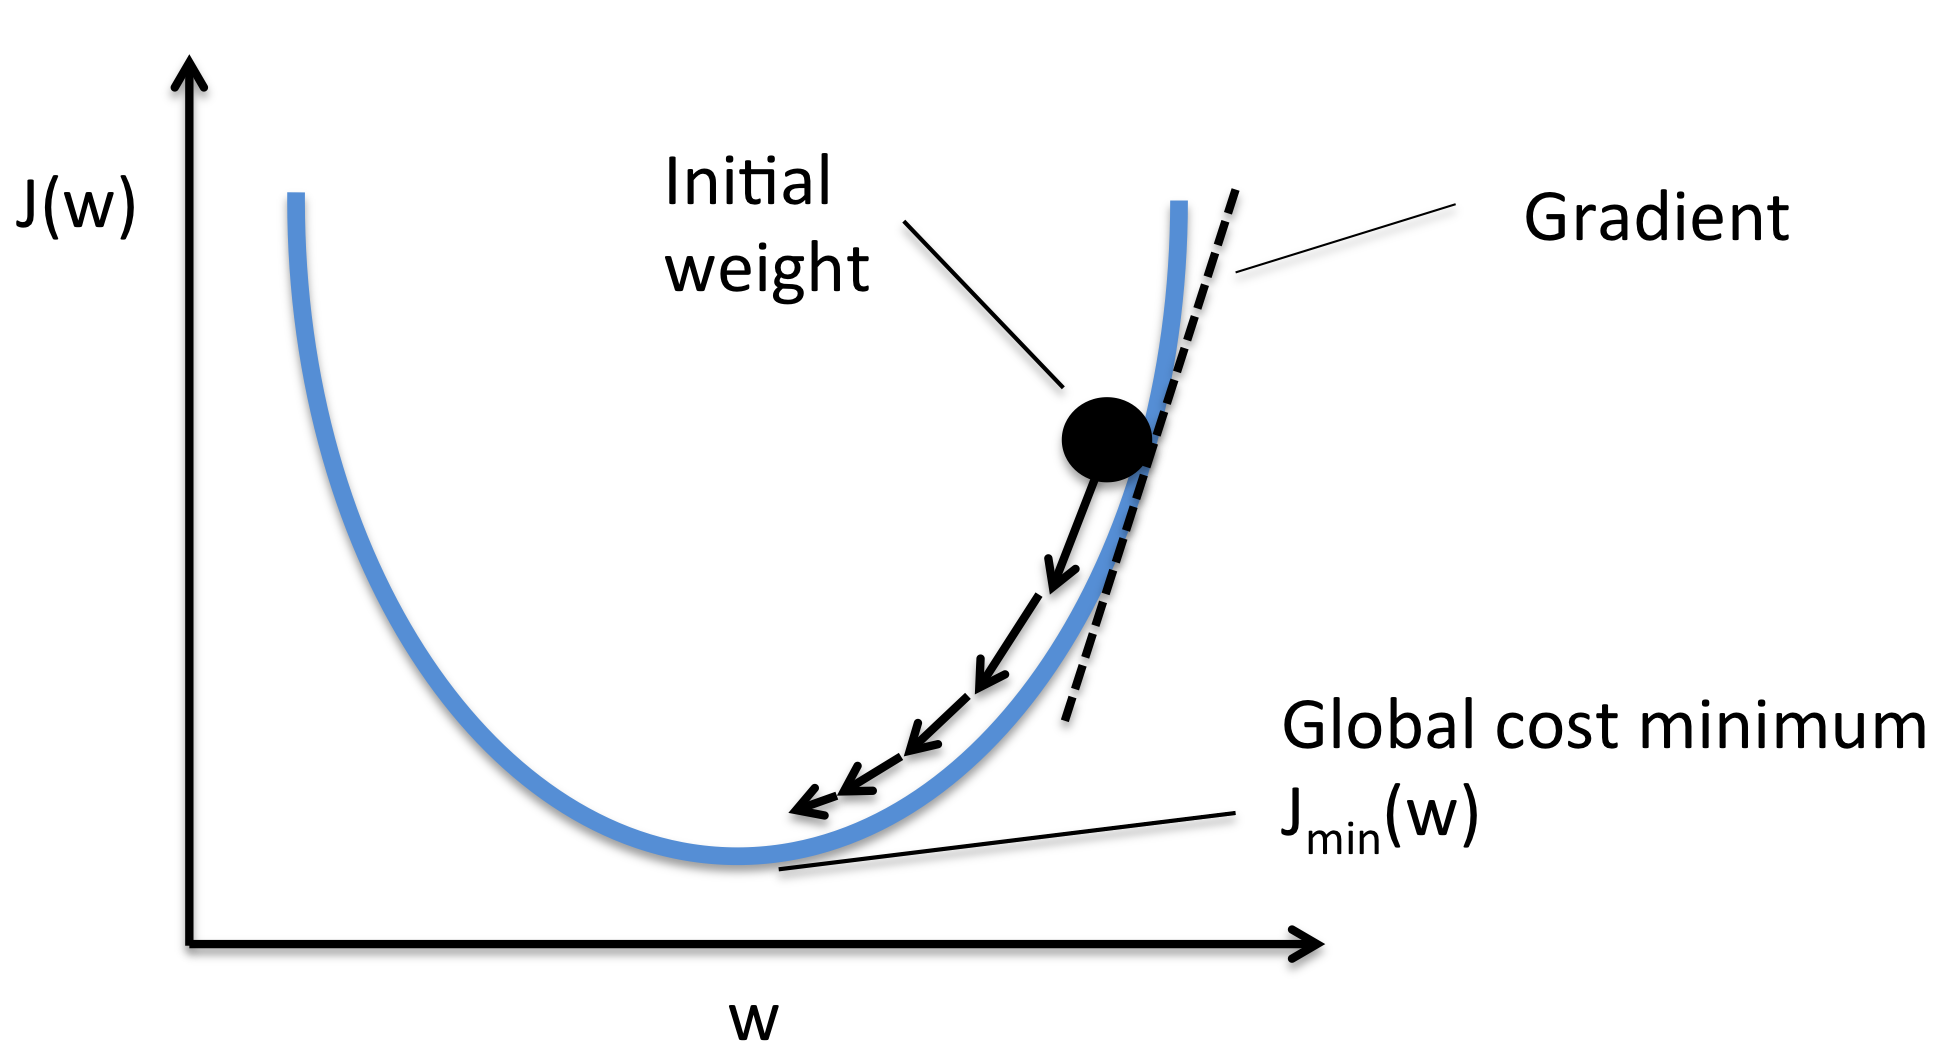

In [0]:
 Image(filename='./images/02_10.png', width=900) 

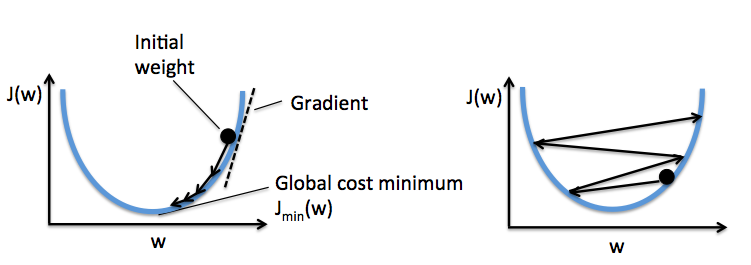

In [0]:
Image(filename='./images/02_12.png', width=1200) 

## Large scale machine learning and stochastic gradient descent

Stochastic Gradient Descent (SGD):
- An optimization technique for online training
- Instead of the gradient, e.g.
$$
 \Delta w = \eta \sum_i \big( y^{(i)} - \phi(z^{(i)}) \big) x^{(i)}, 
$$

- Use a *stochastic* gradient built on a single random sample,
$$
 \eta \big( y^{(i)} - \phi(z^{(i)}) \big) x^{(i)}, 
$$

- or a *mini-batch* stochastic gradient built on a small subsample of the training data:
$$
  \eta \frac{1}{|B|} \sum_{i \in B} \big( y^{(i)} - \phi(z^{(i)}) \big) x^{(i)}, 
$$

In SGD, we often use decreasing learning rate:
- $\eta_k = O(\frac{1}{k})$
- $\eta_k = O(\frac{1}{\sqrt{k}})$

In [0]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, tol=1e-3, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train) # one-vs-rest (OvR)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [0]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


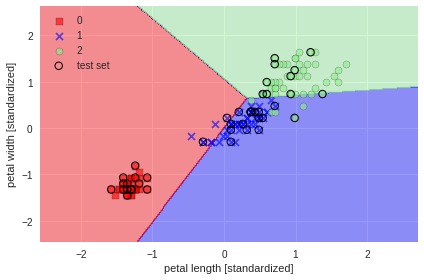

In [0]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Modeling class probabilities via logistic regression

#### Predicting Binomial (Binary) Labels with Conditional Probabilities
$$ 
x \in \mathbb R^m, \;\; y \in \{0,1\}
$$

$$
p = \mathbb P(Y=1 | X=x)
$$

#### Odds-ratio
$$
  \frac{p}{1-p}
$$



#### Logit function (log odds ratio)
$$
 \text{logit}(p) = \log \frac{p}{1-p} \in (-\infty, +\infty)
$$

We model the logit function by a linear function:

$$
\text{logit}(p) = w^T x = z \;\; \text{(net input)}
$$

#### Logistic (Sigmoid) Function

To predict the probability, we use the inverse of the logit function:

$$
 p = \phi(z) = \frac{1}{1 + \exp(-z)}
$$

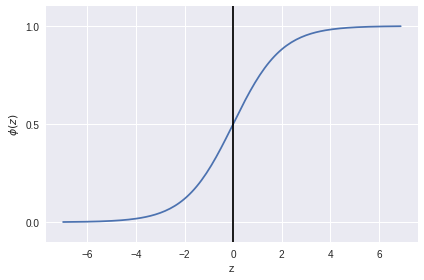

In [0]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

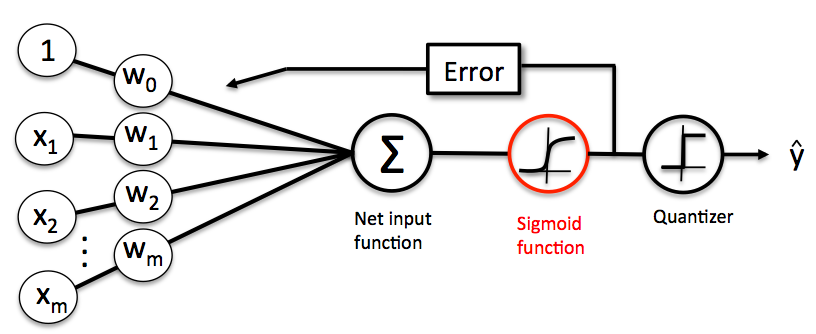

In [0]:
Image(filename='./images/03_03.png', width=900) 

### Learning the weights of the logistic cost function

#### Likelihood Function

$$
 L(w) = \mathbb P(y|x,w) = \prod_{i=1}^n \mathbb P(y^{(i)}|x^{(i)},w) = \prod_{i=1}^n \phi(z^{(i)})^{y^{(i)}} (1-\phi(z^{(i)}))^{1-y^{(i)}} 
$$

#### Log Likelihood Function
$$
 \ell(w) = \log L(w) = \sum_{i=1}^n y^{(i)} \log \phi(z^{(i)}) + (1-y^{(i)}) \log (1-\phi(z^{(i)}))
$$

#### Logistic Regression Training Problem
$$
\min_w \;\; J(w) = -\ell(w)
$$

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all poi

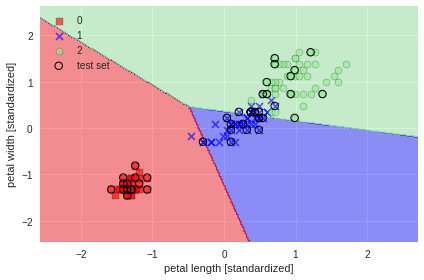

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Tackling overfitting via regularization

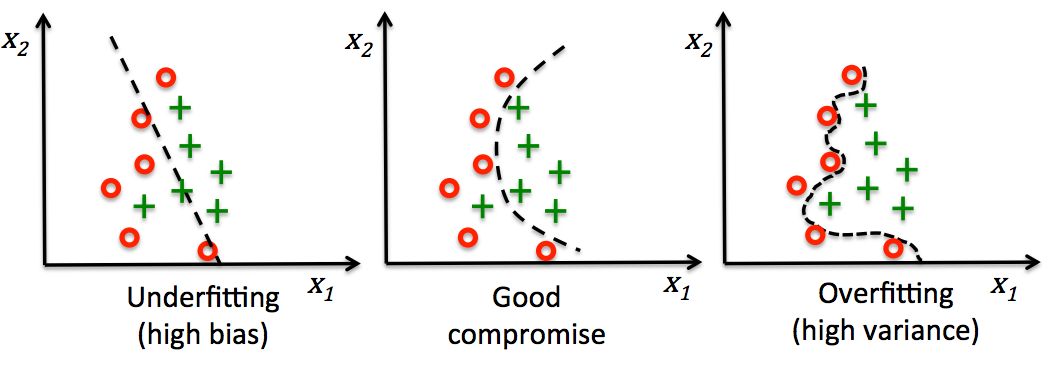

In [0]:
Image(filename='./images/03_06.png', width=1000) 

### Regulariezd Training Problem

**L2 Regularization**
$$
\min_w \;\; J(w) + (1/C) \|w\|_2^2
$$

**L1 Regularization**
$$
\min_w \;\; J(w) + \lambda \|w\|_1
$$

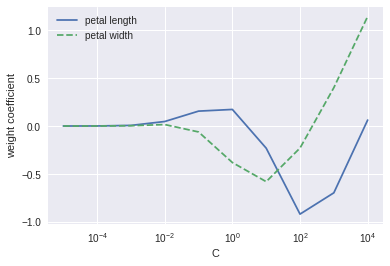

In [0]:
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0, solver='lbfgs', multi_class='auto')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# Maximum margin classification with support vector machines

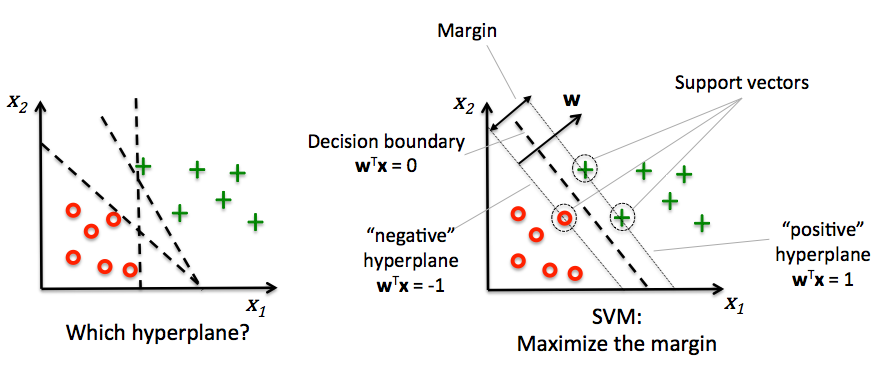

In [0]:
Image(filename='./images/03_07.png', width=1000) 

## Maximum margin intuition

Rationale: having a larger margin tends to make the classifier less prone to overfitting

The expression of the margin: $\frac{2}{||w||_2}$

The (hard) constraints:

$$
\begin{cases}
  w^T x^{(i)} + w_0 \ge 1 & \text{if $y^{(i)} = 1$} \\
  w^T x^{(i)} + w_0 \le -1 & \text{if $y^{(i)} = -1$}
\end{cases}
, i=1,2,\dots, n
$$

$$
 y^{(i)} (w^T x^{(i)} + w_0)\ge 1, \;\; i=1,2,\dots,n
$$

Hard-margin SVM QP (feasible only for linearly separable cases):

$$
 \min_{w,w_0} \;\; \frac12 \|w\|_2^2\\
 \text{subject to} \;\; y^{(i)} (w^T x^{(i)} + w_0)\ge 1, \;\; i=1,2,\dots,n
$$

## Dealing with the nonlinearly separable case using slack variables

Soft-margin SVM QP (feasible in any case):

\begin{align*}
 \min_{w,w_0} &\;\; \frac12 \|w\|_2^2 + C \sum_{i=1}^n \xi_i\\
 \text{subject to} &\;\; y^{(i)} (w^T x^{(i)} + w_0) \ge 1 - \xi_i, \;\; i=1,2,\dots,n \\
  & \xi_i \ge 0
\end{align*}

$\xi_i$: slack variable

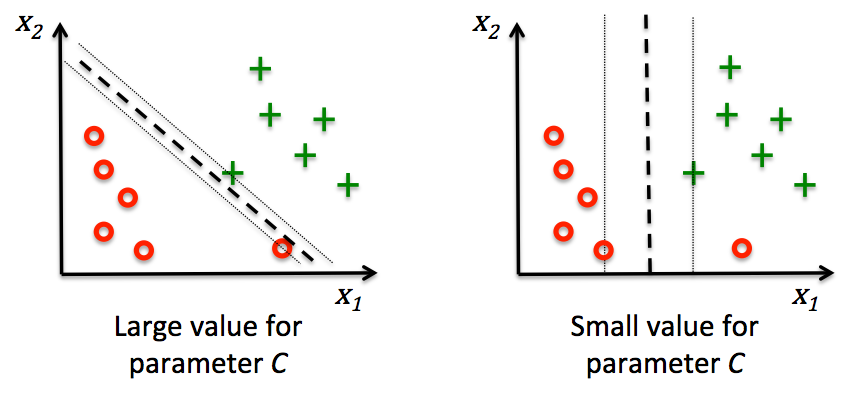

In [0]:
Image(filename='./images/03_08.png', width=1000) 

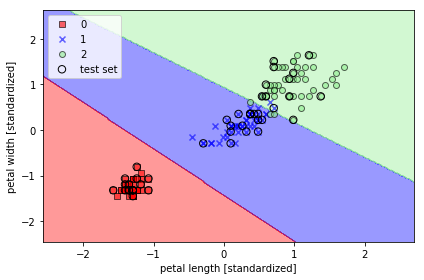

In [0]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_linear.png', dpi=300)
plt.show()

## Thank you!